----

# **User Based Collaborative Filtering**

## **Author**   :  **Muhammad Adil Naeem**

## **Contact**   :   **madilnaeem0@gmail.com**
<br>

----



### **Import Libraries**

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.model_selection import  train_test_split
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### **Load the Dataset**

In [190]:
anime = pd.read_csv("/content/anime.csv")

In [191]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [192]:
ratings = pd.read_csv("/content/rating.csv")

In [193]:
# Print the column names to verify the correct name for the rating column.
print(ratings.columns)

Index(['user_id', 'anime_id', 'rating'], dtype='object')


### **Filtering Out Ratings of -1**

This line of code filters the `ratings` DataFrame to exclude any entries where the `rating` is equal to -1. The result is a new DataFrame that contains only ratings that are not -1, which helps focus on valid ratings for further analysis or modeling.

In [194]:
ratings = ratings[ratings.rating !=-1]

In [195]:
ratings.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [196]:
# Calculate length of Ratings
len(ratings)

6337241

In [197]:
# Length of ratings based on user id
len(ratings['user_id'].unique())

69600

In [198]:
len(anime['anime_id'].unique())

12294

### **Calculating the Average Number of Ratings per User**

This code groups the `ratings` DataFrame by `user_id` and counts the number of ratings each user has given. It then converts this count to a list and calculates the mean of the ratings per user using the `mean` function from the `statistics` module. This provides insight into user engagement by showing the average number of ratings submitted by users.

In [199]:
ratings_per_user = ratings.groupby('user_id')['rating'].count()
statistics.mean(ratings_per_user.tolist())

91.05231321839081

### **Histogram based on raring per user using 20 bins**

<Axes: >

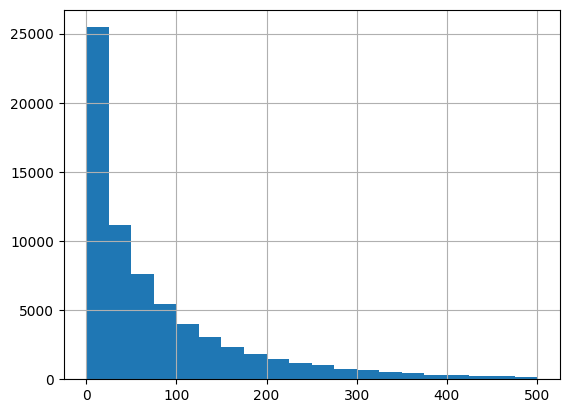

In [200]:
ratings_per_user.hist(bins=20,range=(0,500))

### **Rating_per_anime**

In [201]:
ratings_per_anime = ratings.groupby('anime_id')['rating'].count()
statistics.mean(rating_per_anime.tolist())

50.19424

### **Histogram based on raring per anime using 20 bins**

<Axes: >

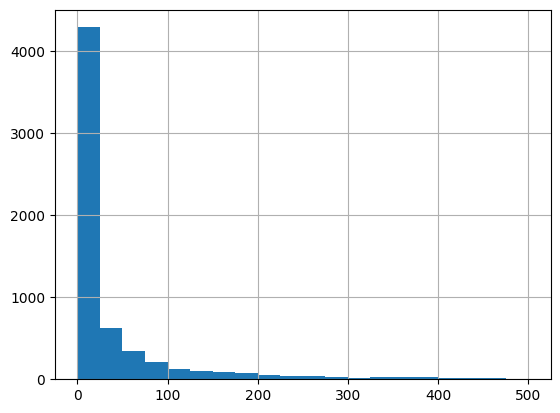

In [202]:
rating_per_anime.hist(bins=20,range=(0,500))

# **Identifying Popular Anime Based on Ratings**

- This code creates a DataFrame `readings_per_anime_df` from a variable `rating_per_anime`, which presumably contains the ratings for each anime. It then filters this DataFrame to include only those anime with ratings of 1000 or more. Finally, it extracts the indices of these popular anime as a list called `popular_anime`. This list can be used for further analysis or recommendations.

In [203]:
ratings_per_anime_df = pd.DataFrame(ratings_per_anime)
filter_ratings_per_anime_df = ratings_per_anime_df[ratings_per_anime_df['rating'] >= 1000]
populer_anime = filter_ratings_per_anime_df.index.tolist()

### **Identifying Popular Users Based on Ratings**

- This code creates a DataFrame `ratings_per_user_df` from the `ratings_per_user` data, which contains the count of ratings given by each user. It then filters this DataFrame to include only those users who have submitted 1000 or more ratings. Finally, it extracts the indices of these active users into a list called `popular_user`. This list can be useful for targeting engaged users in further analysis or recommendations.

In [204]:
ratings_per_user_df = pd.DataFrame(ratings_per_user)
filter_ratings_per_user_df = ratings_per_user_df[ratings_per_user_df['rating'] >= 1000]
profile_user = filter_ratings_per_user_df.index.tolist()

### **Filtering Ratings Based on Popular Anime and Active Users**

1. The first line filters the `ratings` DataFrame to include only entries where the `anime_id` is in the `popular_anime` list, resulting in a DataFrame of ratings for popular anime.
  
2. The second line further filters the `ratings` DataFrame to include only entries where the `user_id` is in the `profile_user` list, resulting in a DataFrame of ratings from active users.

These filtered DataFrames can be used for focused analysis or modeling on popular anime rated by engaged users.

In [205]:
filtered_ratings = ratings[ratings.anime_id.isin(populer_anime)]
filtered_ratings = ratings[ratings.user_id.isin(profile_user)]

### **Creating a User-Item Rating Matrix**

This code creates a pivot table from the `filtered_ratings` DataFrame, using `user_id` as the index, `anime_id` as the columns, and `rating` as the values.

- The resulting `rating_matrix` contains users as rows and anime as columns, with the corresponding ratings filled in.
- Any missing values (where a user has not rated an anime) are filled with `0`, indicating no rating.

The `head()` method displays the first few rows of the `rating_matrix`, allowing for a quick overview of the structured data.

In [206]:
rating_matrix = filtered_ratings.pivot_table(index='user_id', columns='anime_id', values='rating')
rating_matrix = rating_matrix.fillna(0)
rating_matrix.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,34107,34119,34238,34240,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
1530,2.0,3.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2951,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3569,10.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5310,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Finding Similar Users**

This function, `similar_user`, identifies the top `k` users most similar to a given user based on a user-item rating matrix.

1. It retrieves the ratings for the specified `user_id` and the ratings of all other users.
2. It calculates the cosine similarity between the target user and all other users.
3. The similarities are paired with user indices and sorted in descending order.
4. The function extracts the top `k` similar users.
5. Finally, it returns a list of these similar user IDs.

This function can be useful for collaborative filtering and recommendation systems.

In [207]:
import operator
from sklearn.metrics.pairwise import cosine_similarity

def similar_user(user_id, matrix, k=3):
  # Check if user_id exists in the matrix index
  if user_id not in matrix.index:
    return []  # Return an empty list if user_id doesn't exist

  user = matrix[matrix.index == user_id]
  other_users = matrix[matrix.index != user_id]

  similarities = cosine_similarity(user, other_users)[0].tolist()
  indices = other_users.index.tolist()

  index_similarity = dict(zip(indices, similarities))
  index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))
  index_similarity_sorted.reverse()
  top_users_similarities = index_similarity_sorted[:k]
  users = [u[0] for u in top_users_similarities]
  return users

In [208]:
current_user = 3569
similar_user_indices = similar_user(current_user, rating_matrix)
print(similar_user_indices)

[23247, 6969, 28196]


### **Recommending Items Based on Similar Users**

This function, `recomended_item`, generates a list of recommended anime for a specified user based on the ratings of similar users.

1. It calculates the average ratings for anime from users similar to the specified `user_id`.
2. It retrieves the ratings for the target user, focusing on anime that the user has not rated (rating = 0).
3. It filters the average ratings to include only those for anime the user has seen.
4. The filtered average ratings are sorted in descending order to identify the highest-rated unseen anime.
5. The function selects the top `item` (default is 5) anime and retrieves their information from the `anime` DataFrame.
6. Finally, it returns the details of the recommended anime.

This function can be used in recommendation systems to suggest new content to users based on the preferences of similar users.

In [209]:
def recomended_item(user_id, similar_user_indices,item=5):
  similar_user = rating_matrix[rating_matrix.index.isin(similar_user_indices)]
  similar_user = similar_user.mean(axis=0)
  similar_user_df = pd.DataFrame(similar_user, columns=['mean'])

  user_df = rating_matrix[rating_matrix.index==user_id]
  user_df_transposed = user_df.transpose()
  user_df_transposed.columns = ['rating']
  user_df_transposed = user_df_transposed[user_df_transposed['rating']==0]

  animes_seen = user_df_transposed.index.tolist()

  similar_user_df_filtered = similar_user_df[similar_user_df.index.isin(animes_seen)]
  similar_user_df_filtered = similar_user_df_filtered.sort_values('mean', ascending=False)

  top_n_anime = similar_user_df_filtered[:item]
  top_n_anime_indices = top_n_anime.index.tolist()

  anime_information = anime[anime['anime_id'].isin(top_n_anime_indices)]
  return anime_information


In [210]:
recomended_item(3569, similar_user_indices, 5)

,anime_id,name,genre,type,episodes,rating,members
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
251,2025,Darker than Black: Kuro no Keiyakusha,"Action, Mystery, Sci-Fi, Super Power",TV,25,8.25,440334
320,16001,Kokoro Connect: Michi Random,"Comedy, Drama, Romance, School, Slice of Life,...",Special,4,8.19,106989
440,3588,Soul Eater,"Action, Adventure, Comedy, Fantasy, Shounen, S...",TV,51,8.08,580184
